In [3]:
# tabulating function

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def f(x, nu=.6, psi0=1):
    """tabulating free energy 
    """
    
    psi = psi0/(1+ x**(2*nu/(nu-1)))
    
    return psi**(-1/2/nu)*x +(psi0 - psi)**(-1/2/nu) - x -1

In [6]:
res1 = [];res2=[]
for x in np.linspace(0.25, 1, 50):
    res1.append(x)
    res2.append(f(x))

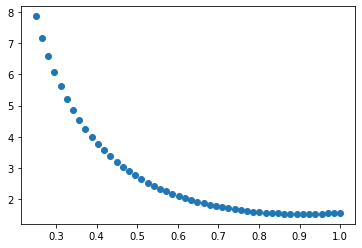

In [7]:
plt.scatter(res1, res2)

In [8]:
7475/72.

103.81944444444444

In [9]:
nu = 1/2.

D = 5
N  = 100
g = D**(1/nu)
n_bl = N/g

In [10]:
n_bl

4.0

In [11]:
def free(n0):
    
    return n0 + (n_bl - n0)*2**(1/2/nu)

In [12]:
def rcc(n0):
    return n0*D/n_bl*(n0 + (n_bl- n0*2**(1/2/nu - .5)))

In [13]:
res1 = [];res2=[]
for x in np.linspace(0, n_bl, 50):
    res1.append(x)
    res2.append(free(x))

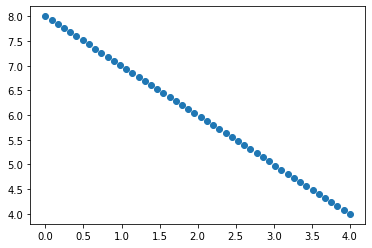

In [14]:
plt.scatter(res1, res2)

In [15]:
res1 = [];res3=[]
for x in np.linspace(0, n_bl, 50):
    res1.append(x)
    res3.append(rcc(x))

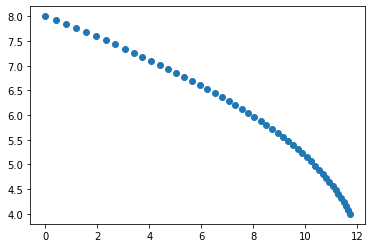

In [16]:
plt.scatter(res3, res2)

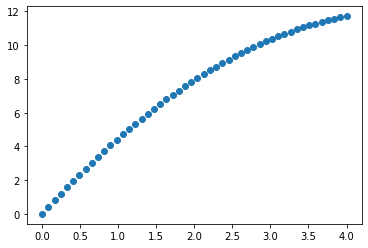

In [17]:
plt.scatter(res1, res3)

In [18]:
def binodal(phi):
    return (-np.log(phi)+ np.log(1-phi))/(1-2*phi)



In [19]:
res1=[];res2=[]
for phi in np.linspace(0.01,.99, 50):
    res1.append(phi)
    res2.append(binodal(phi))

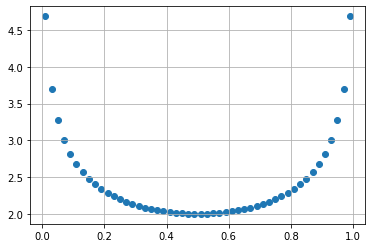

In [20]:
plt.scatter(res1, res2)
plt.grid()

In [21]:
def f(x,y):
    return np.exp(-(x-.5)**2 - (y-0.5)**2)

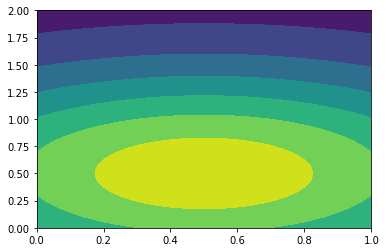

In [22]:
X = np.linspace(0,1, 50)
Y = np.linspace(0,2, 100)

XX, YY = np.meshgrid(X,Y, sparse=True)
Z = f(XX,YY)
plt.contourf(X, Y, Z)

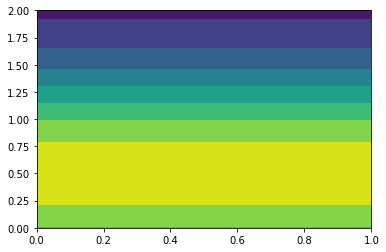

In [23]:
plt.contourf(X, Y, Z/np.sum(Z,axis=0))

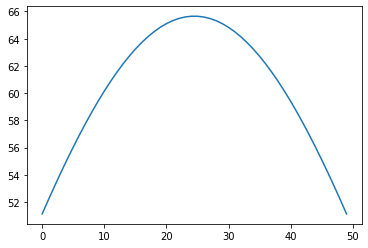

In [24]:
plt.plot(np.sum(Z,axis=0)) 

In [25]:
def alpha_n(N, N0, nu=0.5):
    
    return 1/(1 + ((N0-N)/(2*N))**((1-nu)/(2*nu))  )


In [26]:
r1 = []
r2 = []
N0=100
for n in np.linspace(0, N0, 100):
    r1.append(n)
    r2.append(alpha_n(n, N0))
    

/var/folders/zr/t79_wh252w1d3vc6snt72_lh0000gn/T/ipykernel_65422/3647886478.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  return 1/(1 + ((N0-N)/(2*N))**((1-nu)/(2*nu))  )


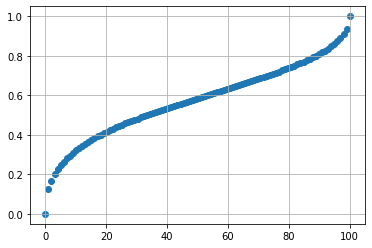

In [27]:
plt.scatter(r1,r2)
plt.grid()

In [28]:
def ener(alpha, n, n0, nu=0.5):
    
        if n ==0:
            return n0
        elif n==n0:
            return 2*n0
        else:
            return 2*n*alpha**(-1/2/nu) + (n0-n)*(1-alpha)**(-1/2/nu)

In [29]:
N0=100
r3 = []
for n in r1:
    alpha = r2[r1.index(n)]
    r3.append(ener(alpha, n, N0))
    

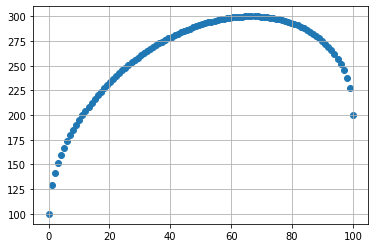

In [30]:
plt.scatter(r1,r3)
plt.grid()

In [31]:
N0=50
x = np.arange(1,N0)
y1 = 2*x
y2 = N0-x

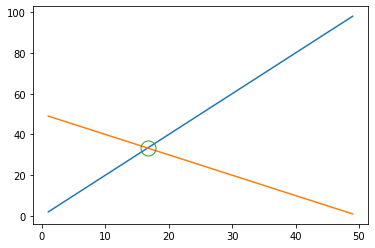

In [32]:
plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(N0/3., 2.*N0/3, marker="o", markersize=15,markerfacecolor='None')

In [33]:
def get_ncrit(N0, lambda_, nu=0.5):
    
    return N0/(1+2*(lambda_/(1-lambda_))**(.5*(1-1/nu)) 
              )

In [34]:
get_ncrit(90, 0.5) == 30

True

In [35]:
# def get_free_energy(N, S, lambda_, N0, nu):
    
#     f1=f2=f3=0
    
#     f1 = (N0-N)*(S*(1-lambda_))**(-.5/nu)
    
#     N_crit = get_ncrit(N0, lambda_,  nu)
    
#     if N < N_crit:
#         f2 = 2*N*(lambda_*S)**(-.5/nu)
        
#     else:
#         f2 = (N0-N)*(S*(1-lambda_))**(.5*(1-1./nu))*(lambda_*S)**(-.5)
        
# #         f3 = S**(-.5/nu)*(2+ (lambda_/(1-lambda_)))*(N-N_crit)
        
# #         f3 = (S**(-.5/nu) + (S*(1-lambda_))**(0.5*(1-1/nu))/S**(.5) )*(N-N_crit)
# #         f3 = (N-N_crit)*(2+ (g2/g1)*(s1/s2)**.5)/g

        
#     return f1+f2+f3

In [36]:
# ns = []
# ens=[]
# N0=200
# n_lambdas = 10
# S =10
# lambdas = np.linspace(0.05, 0.8, n_lambdas)

# for lambda_ in lambdas:
#     for n in range(1,N0+1):
#         ns.append(n)
#         ens.append(get_free_energy(n, S=10, lambda_=lambda_, N0=N0, nu=.6)/(N0+n))
        
# for n in range(1,N0+1):
#     ns.append(n)
#     ens.append(get_free_energy(n, S=S, lambda_=0.5, N0=N0, nu=.6)/(N0+n))
        

In [37]:
# plt.figure(figsize=(12,8))
# ns = np.reshape(ns, (n_lambdas+1, N0))
# ens = np.reshape(ens, (n_lambdas+1, N0))
# for i in range(ns.shape[0]-1):
    
#     plt.plot(ns[i],ens[i], label="$\lambda=${:.2f}".format(lambdas[i]))
    
# plt.plot(ns[ns.shape[0]-1],ens[ns.shape[0]-1], label="$\lambda=${:.2f}".format(0.5), linewidth=2.5, color='black')
# plt.axhline(y=int("{:d}".format(S))**(-.5/.6), color='r', linestyle='-', linewidth=3,label='exact analytical')

# plt.legend()
# plt.grid()
# plt.xlabel("n, number of monomers taken from the mother DNA")
# plt.ylabel("Free energy per bead in joined system")
# plt.title("""Specific free energy for different $\lambda: S2=\lambda S,  S1=(1-\lambda) S$, $S -e.coli$ crossection area
# N=%i, S=%i""" %(N0,  S))

In [38]:
10**(-.5/.6)

0.14677992676220694

In [39]:
def get_ncrit(N0, lambda_, S, nu=0.5):
    
    s2 = lambda_*S
    s1 = (1-lambda_)*S
    g1 = s1**(.5/nu)
    g2 = s2**(.5/nu)
    
    return   N0/(1 +  2*(g1/g2)*(s2/s1)**.5 )
              

In [40]:
get_ncrit(90, .5, 10) == 30

True

In [41]:
def free_energy(N, N0, lambda_, S, nu=.5):
    
    s2 = lambda_*S
    s1 = (1-lambda_)*S
    g1 = s1**(.5/nu)
    g2 = s2**(.5/nu)
    g = S**(.5/nu)
    
    f1=f2=f3=0
    f1 = (N0-N)/g1
    
    N_crit = get_ncrit(N0, lambda_, S, nu=nu)
    
    if N<=N_crit:
        f2 = 2*N/g2
    else:
#         f2 = ((N0-N)/g1)*(s1/s2)**.5
        f2 = 2*N_crit/g2 - (N-N_crit)*(s1/s2)**.5/g1
        
#         f3 = 2*(N-N_crit)/g + (N-N_crit)*(s1/S)**.5/g1
#         f3 = 2*(N-N_crit)/g + (N-N0+N_crit)*(s1/S)**.5/g1
        f3 = (N-N_crit)*(2+ (g2/g1)*(s1/s2)**.5)/g

    return f1+f2+f3

In [42]:
ns = []
ens=[]
N0=190
n_lambdas = 20
S =10
lambdas = np.linspace(0.05, 0.8, n_lambdas)

for lambda_ in lambdas:
    for n in range(1,N0+1):
        ns.append(n)
        ens.append(free_energy(n, N0=N0, lambda_=lambda_, S=S, nu=.6)/(N0+n))
        
for n in range(1,N0+1):
    ns.append(n)
    ens.append(free_energy(n, N0=N0, lambda_=.5, S=S, nu=.6)/(N0+n))

Text(0.5, 1.0, 'Specific free energy for different $\\lambda: S2=\\lambda S,  S1=(1-\\lambda) S$, $S -e.coli$ crossection area\nN=190, S=10')

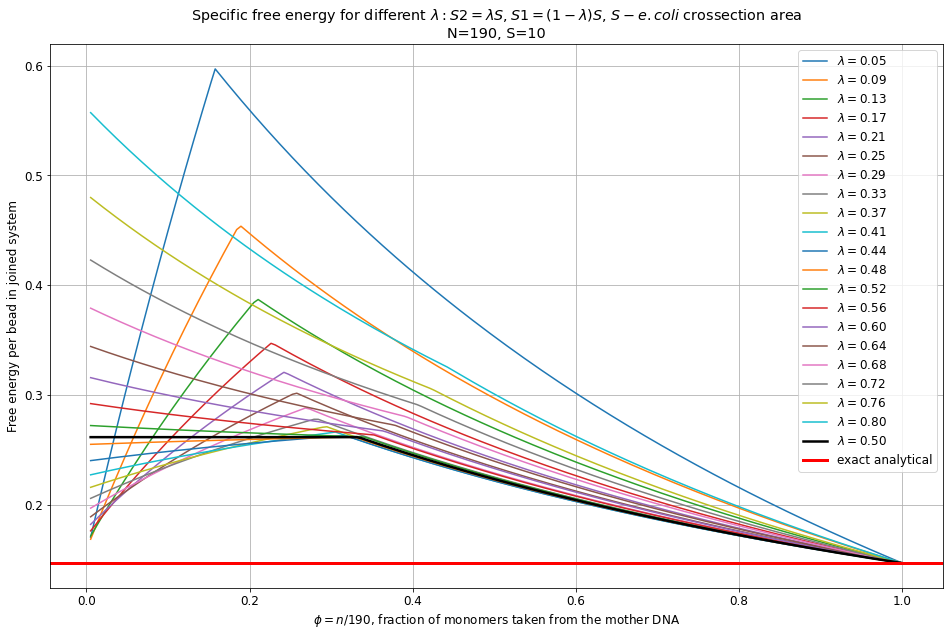

In [43]:
plt.figure(figsize=(16,10))
plt.rc('font', size=12)

ns = np.reshape(ns, (n_lambdas+1, N0))/N0
ens = np.reshape(ens, (n_lambdas+1, N0))
for i in range(ns.shape[0]-1):
    
    plt.plot(ns[i],ens[i], label="$\lambda=${:.2f}".format(lambdas[i]))
    
plt.plot(ns[ns.shape[0]-1],ens[ns.shape[0]-1], label="$\lambda=${:.2f}".format(0.5), linewidth=2.5, color='black')

plt.axhline(y=int("{:d}".format(S))**(-.5/.6), color='r', linestyle='-', linewidth=3,label='exact analytical')

plt.legend()
plt.grid()
plt.xlabel("$\phi=n/%i$, fraction of monomers taken from the mother DNA" %N0)
plt.ylabel("Free energy per bead in joined system")
plt.title("""Specific free energy for different $\lambda: S2=\lambda S,  S1=(1-\lambda) S$, $S -e.coli$ crossection area
N=%i, S=%i""" %(N0,  S))

Specific conformational free  energy for the suggested model of chromosome segregation in the Flory model frame.

A nucleoid is presented as a tube of cross-section area $S$. Initially the mother chromosome is located in the sub-tube of crossection area $S_1=(1-\lambda)S$, $\lambda \in[0..1]$.

The  another subtube is a space where the actual replication happens has crossection area as $S_2 =\lambda S$, so $S= S_1+S_2$.

The flow is the following: each "timestep" one monomer from $S_1$ deappears (mother chain  becomes shorter).
At the same time 2 monomers appears in the subtube with $S_2$ (daughter chains grow with double speed).
That continues until the critical $N_{crit}$, at which the length of subtube $S_1$ is being equal the length of the subtube with $S_2$.

Starting from that moment, the full volume with $S$ is being available for the daughter chains, and the subtube with $S_2$ starts to shrink with the same pace as the subtube with $S_1$. 

At the end of the segregation, all monomers from the mother chain (subtube $S_1$) are been pushed/relocated to the tube  of $S$.



As one can see, the specific conformation free energy has different curves based on the $\lambda$.
If the subtube $S_2$ is very narrow, it  need a lot of energy to push the blobs into segregation subtube $S_2$.
On the opposite side, if $S_2>S_1$ then the process of segregation happens spontaneously -- free energy just  
decreases.

A special case is for $\lambda = 0.5$, so $S_1 = S_2$. In this case the initial curve is horisontal, meaning that
free energy does not change while replicating.

Also one should notice that at the end of the segregation the curves for different $\lambda$ converge  to the 
same value. Indeed, regardless  of how the cell is initially partitioned by $\lambda$, the final state is the same --
the two segregated chains squeezed in the same volume.

Finally, the Flory model allows to analytically calculate the specific free energy based on the number of monomers 
and the crossection area of the compression tube. All the curves convergy to that value.


The suggested model contrary to the ones I read about, takes into account the dynamics of the process 
(change in number of monomers and occupied  volume).
It also distinguishes the regimes where segregation happens automatically and those where some work 

# Simulation setup

<!-- ![pics/IMG_6043.jpeg](attachment:IMG_6043.jpeg) -->
![pics/IMG_6043.jpeg](pics/IMG_6043.jpeg)

The system parameters are:
1. $S$ -- the cross-section area
1. $\lambda$ -- the area splitting parameter: $S_1 = (1-\lambda S)$, $S_2 = \lambda S$
1. $l$ is the length of the container with the mother ring polymer
1. $L$ is the length of the container for the subtube with $\lambda S$ crossection
1. $N_1$ is the number of monomers in tube 1; $N_2$ -- in the tube 2.

While  the number of monomers is increasing during the experiment, we adjust the $l$ and $L$ to keep the monomer concentration $c$ constant.

$$
L = \frac{(N_1+N_2)}{cS}
$$
and

$$
l = \frac{N_1}{c(1-\lambda)S}.
$$


We consider that the division area, depicted by two dots, is a narrow bottleneck, where the chains $N_1$ and $N_2$ originate, does not contribute to the entropy due to its small size.
The entropy is an additive function, so $S(N_1 + N_2) = S(N_1) + S(N_2)$.

# Simulation expectation 1

During the simulation, the $S_{SAW} = k_B\ln\Omega(N)$ will be calculated,  where $SAW$  stands for self-avoiding walks, and $\Omega(N)$ gives the number of non-overlapping conformations for given $N$.


Having the $S$ we can calculate $F = U  - TS$, which is $F = -S$ in energy units of $k_BT$ and $U$ is been
taken care of in the form of SAW (excluded volume interactions).

Finally, one  can compare the results with the theoretical predictions.

# Simulation expectation 2

In the simulation setup sketch, the replicated chromosome is presented by a single chain. One can use two chains
explicitly, following the biology of cell replication.

We should be able to observe the segregation  as well, having the sufficiently long chains and narrow channel.

#  Simulation (Theory) Expectation 3

Investigate work needed to climb the critical $N$ for different $\lambda$.

# What is that "prohibited" area on the plot "free energy vs $\phi$"?

# $\Delta F$ as a  function of $\lambda$

$$\Delta F = \frac{2N_{crit}}{N_0+N_{crit}}\left(\frac{1}{g_2}-\frac{1}{g_1}\right),$$

where 
$$N_{crit} = \frac{2N_0}{\left(1+2\frac{g_1}{g_2}\left(\frac{S_2}{S_1}\right)^{1/2}\right)},$$

$N_0$ -- initial number of monomers, and $g\propto (S/b)^{1/2\nu}$ -- number  of monomers per compression blob, with $b$ -- Kuhn bond length.

The $S_2 = \lambda S$ and $S_1 = (1-\lambda)S$, $S$ -- channel area.

In [44]:
def delta_f(lambda_, N0, S,  nu=0.5):
    """
    returns delta F as a function of lambda
    """
    
    N_crit = get_ncrit(N0, lambda_, S, nu=nu)
    s2 = lambda_*S
    s1 = (1-lambda_)*S
    g1 = s1**(.5/nu)
    g2 = s2**(.5/nu)
    

    return 2*N_crit/(N0+N_crit) * (1/g2 - 1/g1)
        
               

In [45]:
lm = []
res = []
for l in np.linspace(0.01, 0.5, 100):
    lm.append(l)
    res.append(delta_f(l, N0=90, S=10, nu=0.6))

Text(0.5, 1.0, 'Potential barrier height per monomer as a function of $\\lambda$')

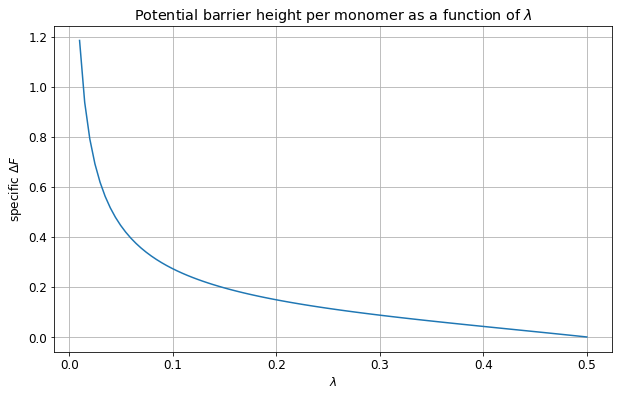

In [46]:
plt.figure(figsize=(10,6))

plt.plot(lm, res)
plt.xlabel("$\lambda$")
plt.ylabel("specific $\Delta F$")
plt.grid()
plt.title("Potential barrier height per monomer as a function of $\lambda$")

### As soon as replication starts, the monomers start to fill the channel with $S_2$.

If the channel width, driven by $\lambda$, is less than 0.5 it leads to energy per monomer increase.
That energy  increase is used to push the sides of the $S_2$ channel. 
The work needed to push the borders is proportional to the volume of the channel:  $V(N)=l(N)\times S_2$, where $l(N)$ is the
length of the $N$ monomers arranged into compression blobs following Flory theory.


In [47]:
n_lambdas = 100
nu = 0.6
S =10
lambdas_ = []
vols = []
lambdas = np.linspace(0.01, 0.5, n_lambdas)

for lambda_ in lambdas:
#     N_crit = get_ncrit(N0=90, lambda_=lambda_, S=S, nu=nu)
    
    V = 2*(S*lambda_)**(0.5*(3-(1/nu)))
    lambdas_.append(lambda_)
    vols.append(V)

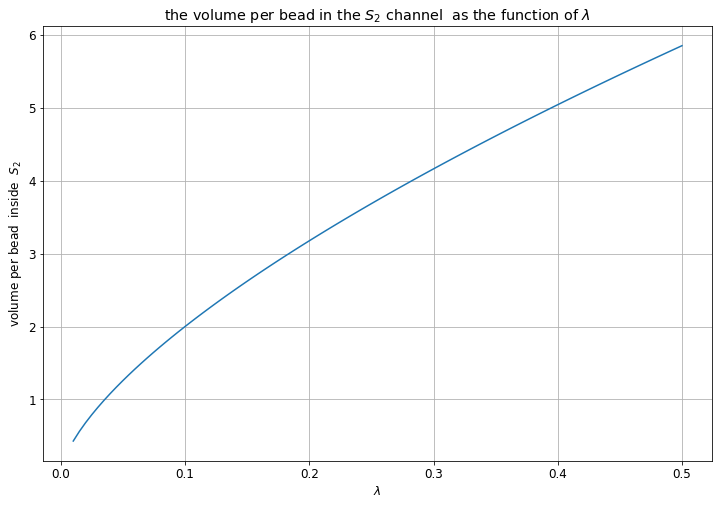

In [48]:
plt.figure(figsize=(12,8))
plt.plot(lambdas_, vols)
plt.title("the volume per bead in the $S_2$ channel  as the function of $\lambda$")
plt.xlabel("$\lambda$")
plt.ylabel("volume per bead  inside  $S_2$")
plt.grid()

### So the  value of $\lambda$  influences the free energy increase while pushing the monomers into $S_2$ channel.
With $\lambda$ being small, the compression blobs lack a lot of conformation entropy and thus have higher free energy.
Starting from $\lambda=0.5$  the process of filling the $S_2$ channel is spontaneous --  the increase of free energy is negative.

On the other hand, with small $\lambda$ "cell pump" (or those highly energetic compression blobs) have  less work to do in order to push the volume $V(N)=l(N)\times S_2$. With increasing $\lambda$ the  volume grows and work as well.

Are (is) there any special values of $\lambda$ which on one hand do not provoke large increase in the free energy,  and on the  another do not  require large work to be done pushing the borders?

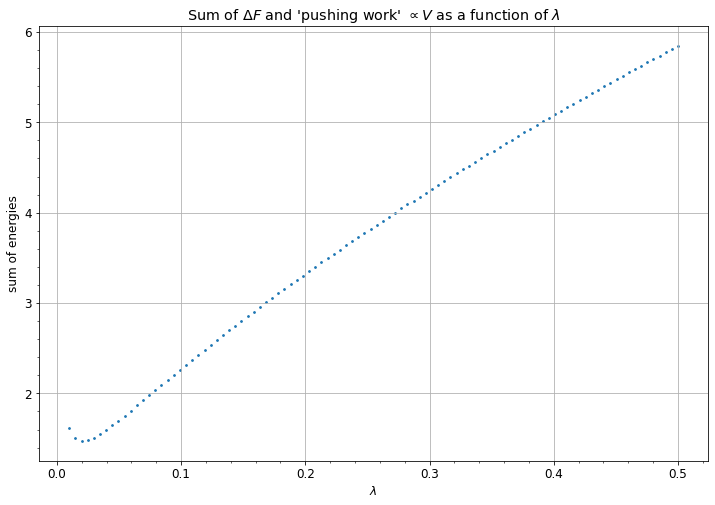

In [49]:
plt.figure(figsize=(12,8))
plt.title("Sum of $\Delta F$ and 'pushing work' $\propto V$ as a function of $\lambda$")
plt.scatter(lambdas_, [v[0]+v[1] for v in  zip(res,vols)], s=3)
plt.grid()
plt.xlabel("$\lambda$")
plt.ylabel('sum of energies')
plt.minorticks_on()

# fraction of $\frac{N_{crit}}{N_0}$ as  a  function of $\lambda$.

That  is what is the fraction of monomers been used to push out the  $V_2$ volume.

$$
\varphi = \frac{N_{crit}}{N_0} = \frac{1}{1+2(\frac{\lambda}{1-\lambda})^{\frac{1}{2}(1/\nu -1)}}
$$

In [50]:
n_lambdas = 50
lambdas = np.linspace(0.01, 0.6, n_lambdas)
nu = 0.6

f  = lambda x: 1/(1+2*((1-x)/x)**(.5*(1/nu -1)))

res = [f(l) for l in lambdas]


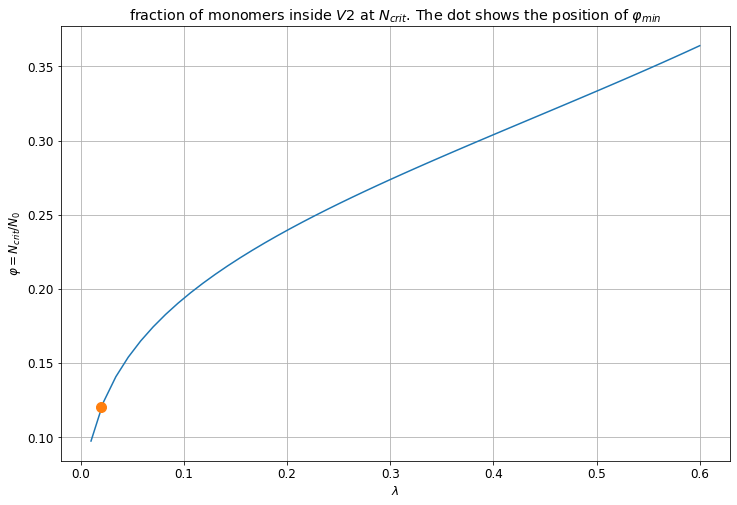

In [51]:
plt.figure(figsize=(12,8))
plt.title("fraction of monomers inside $V2$ at $N_{crit}$. The dot shows the position of $\\varphi_{min}$")
plt.ylabel("$\\varphi = N_{crit}/N_0$")
plt.xlabel("$\lambda$")
plt.plot(lambdas, res)
plt.plot(0.02, f(0.02), markersize=10, marker='o')

plt.grid()

the graph above tells that about 12% of the  mother chain needs to be replicated until the volume corresponding 
to the $\lambda\approx 0.02$ will be pushed by the replicated chains.

# from Minina for $\lambda=0.5$

In [100]:
nbl=28
S = 10
ns_minina = np.linspace(0, nbl,100)
nu=0.6
f_cm = lambda x: (np.sqrt(S)*x/nbl)*(x + (nbl -x)*2**(.5*(1/nu -1)))
f_en = lambda x: 2*(x + (nbl -x)*2**(.5/nu))

rcc = [f_cm(x) for x in ns_minina]
fen  = [f_en(x) for x in ns_minina]

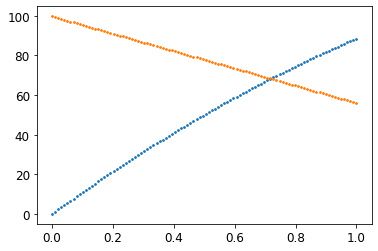

In [101]:
plt.scatter(ns_minina/nbl, rcc, s=3)
plt.scatter(ns_minina/nbl, fen, s=3)


number of blobs

In [92]:
190/10**(5/6)

27.88818608481932

In [93]:
def dist_cm(N, N0, lambda_, S, nu=.5):
    
    s2 = lambda_*S
    s1 = (1-lambda_)*S
    g1 = s1**(.5/nu)
    g2 = s2**(.5/nu)
    g = S**(.5/nu)
    
    n2=n3=l2=l3=0
#     f1 = (N0-N)/g1
    
    N_crit = get_ncrit(N0, lambda_, S, nu=nu)
    
    if N<=N_crit:
        l2 = 2*N*s2**.5/g2
        n2 = 2*N
#         cm2 = n2*  l2/2/(N0+N)
    else:
#         f2 = ((N0-N)/g1)*(s1/s2)**.5
        l2 = 2*N_crit*s2**.5/g2 - (N-N_crit)*(s1)**.5/g1
        n2 = 2*N_crit - (g2/g1)*(s1/s2)**.5*(N-N_crit)
#         cm2 = n2*  l2/2/(N0+N)

#         f3 = 2*(N-N_crit)/g + (N-N_crit)*(s1/S)**.5/g1
#         f3 = 2*(N-N_crit)/g + (N-N0+N_crit)*(s1/S)**.5/g1
        l3 = (N-N_crit)*(2+ (g2/g1)*(s1/s2)**.5)*S**.5/g
        n3 = (2+ (g2/g1)*(s1/s2)**.5)*(N-N_crit)
        
#         cm3 = n3*l3/2/(N0+N)

    return (n2*l2/2 + (l2+l3/2)*n3)/(N+N)
#     return cm2

In [94]:
ns = []
ens=[]
N0=190
n_lambdas = 20
S =10
lambdas = np.linspace(0.01, 0.7, n_lambdas)

for lambda_ in lambdas:
    for n in range(1,N0+1):
        ns.append(n)
        ens.append(dist_cm(n, N0=N0, lambda_=lambda_, S=S, nu=.6))
        
for n in range(1,N0+1):
    ns.append(n)
    ens.append(dist_cm(n, N0=N0, lambda_=.5, S=S, nu=.6))
    
N0*S**(.5*(1-1/nu))

88.1901878386428

Text(0.5, 1.0, 'Distance between centers of mass of daugher polymers, $R_{c-c}$, for \ndifferent $\\lambda: S2=\\lambda S,  S1=(1-\\lambda) S$, $S -e.coli$ crossection area N=190, S=10')

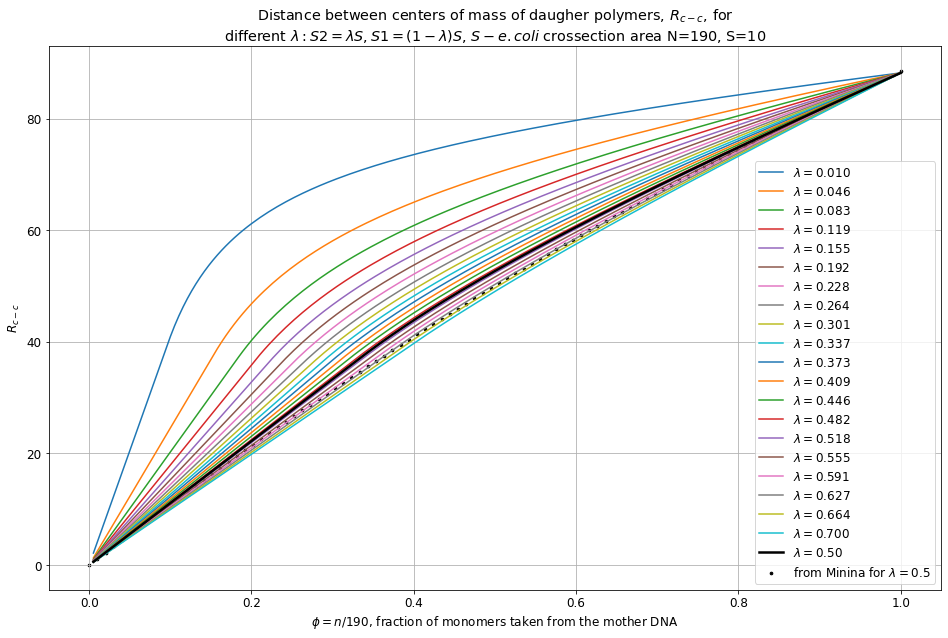

In [96]:
plt.figure(figsize=(16,10))
plt.rc('font', size=12)

ns_ = np.reshape(ns, (n_lambdas+1, N0))/N0
ens = np.reshape(ens, (n_lambdas+1, N0))
for i in range(ns_.shape[0]-1):
    
    plt.plot(ns_[i],ens[i], label="$\lambda=${:.3f}".format(lambdas[i]))
    
plt.plot(ns_[ns_.shape[0]-1],ens[ns_.shape[0]-1], label="$\lambda=${:.2f}".format(0.5), linewidth=2.5, color='black')

# plt.axhline(y=int("{:d}".format(S))**(-.5/.6), color='r', linestyle='-', linewidth=3,label='exact analytical')
plt.scatter(ns_minina/nbl, rcc, s=7, color='black', label = 'from Minina for $\lambda=0.5$')
plt.legend()
plt.grid()
plt.xlabel("$\phi=n/%i$, fraction of monomers taken from the mother DNA" %N0)
plt.ylabel("$R_{c-c}$")
plt.title("""Distance between centers of mass of daugher polymers, $R_{c-c}$, for 
different $\lambda: S2=\lambda S,  S1=(1-\lambda) S$, $S -e.coli$ crossection area N=%i, S=%i""" %(N0,  S))

# Free energy as a function of center of mass separation

In [97]:
def free_cm(N, N0, lambda_, S, nu=.5):
    
    s2 = lambda_*S
    s1 = (1-lambda_)*S
    g1 = s1**(.5/nu)
    g2 = s2**(.5/nu)
    g = S**(.5/nu)
    
    n2=n3=l2=l3=0

    f1=f2=f3=0
    f1 = (N0-N)/g1
    
    N_crit = get_ncrit(N0, lambda_, S, nu=nu)
    
    if N<=N_crit:
        l2 = 2*N*s2**.5/g2
        f2 = 2*N/g2
        n2 = 2*N
    else:
        f2 = 2*N_crit/g2 - (N-N_crit)*(s1/s2)**.5/g1

        l2 = 2*N_crit*s2**.5/g2 - (N-N_crit)*(s1)**.5/g1
        n2 = 2*N_crit - (g2/g1)*(s1/s2)**.5*(N-N_crit)

        l3 = (N-N_crit)*(2+ (g2/g1)*(s1/s2)**.5)*S**.5/g
        n3 = (2+ (g2/g1)*(s1/s2)**.5)*(N-N_crit)
        f3 = (N-N_crit)*(2+ (g2/g1)*(s1/s2)**.5)/g

    cm =  (n2*l2/2 + (l2+l3/2)*n3)/(N+N)
    free_energy = f1+f2+f3
    return cm, free_energy


In [98]:
ns = []
ens=[]
N0=190
n_lambdas = 10
S =10
lambdas = np.linspace(0.05, 0.8, n_lambdas)

for lambda_ in lambdas:
    for n in range(1,N0+1):
        tmp = free_cm(n, N0=N0, lambda_=lambda_, S=S, nu=.6)
        ns.append(tmp[0])
        ens.append(tmp[1]/(N0+n))
        
for n in range(1,N0+1):
    tmp = free_cm(n, N0=N0, lambda_=.5, S=S, nu=.6)
    ns.append(tmp[0])
    ens.append(tmp[1]/(N0+n))
        
  

Text(0.5, 1.0, 'Specific Free energy as a function of distance between centers of mass of daugher polymers, \n$R_{c-c}$, for different $\\lambda: S2=\\lambda S,  S1=(1-\\lambda) S$, $S -e.coli$ crossection area N=190, S=10')

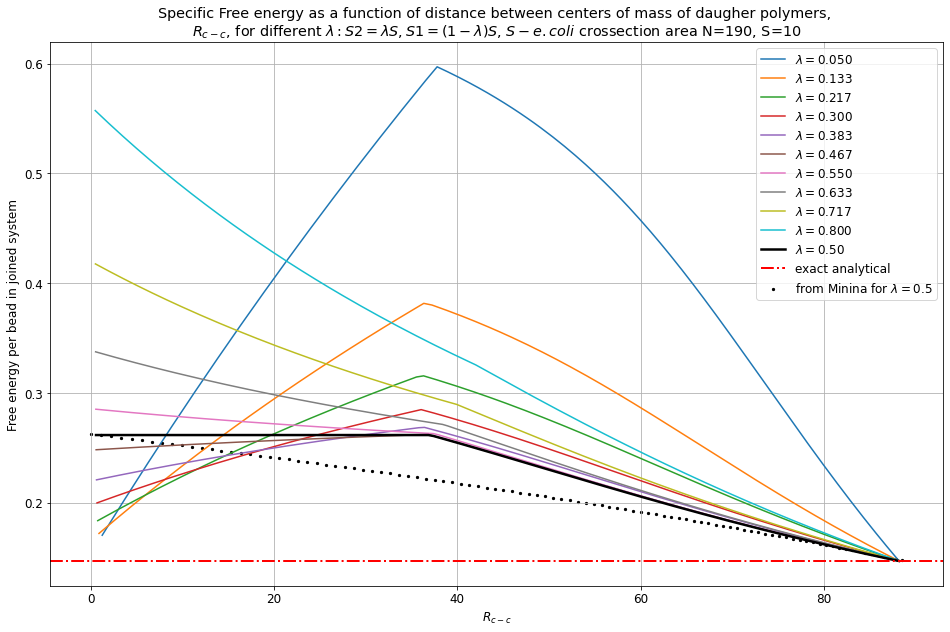

In [105]:
plt.figure(figsize=(16,10))
plt.rc('font', size=12)

ns_ = np.reshape(ns, (n_lambdas+1, N0))
ens = np.reshape(ens, (n_lambdas+1, N0))
for i in range(ns_.shape[0]-1):
    
    plt.plot(ns_[i],ens[i], label="$\lambda=${:.3f}".format(lambdas[i]))
    
plt.plot(ns_[ns_.shape[0]-1],ens[ns_.shape[0]-1], label="$\lambda=${:.2f}".format(0.5), linewidth=2.5, color='black')

plt.axhline(y=int("{:d}".format(S))**(-.5/.6), color='r', linestyle='-.', linewidth=2,label='exact analytical')
plt.scatter(rcc, [el/2/N0 for el in fen], s=5, color='black', label = 'from Minina for $\lambda=0.5$')
plt.legend()
plt.grid()
plt.ylabel("Free energy per bead in joined system")
plt.xlabel("$R_{c-c}$")
plt.title("""Specific Free energy as a function of distance between centers of mass of daugher polymers, 
$R_{c-c}$, for different $\lambda: S2=\lambda S,  S1=(1-\lambda) S$, $S -e.coli$ crossection area N=%i, S=%i""" 
          %(N0,  S))